## Required lib and modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

## Importing Data files

In [13]:
baner = pd.read_excel('data_source/Baner_cleaned.xlsx')
bavdhan = pd.read_excel('data_source/Bavdhan_cleaned.xlsx')
hinjewadi = pd.read_excel('data_source/Hinjawadi_cleaned.xlsx')
wakad = pd.read_excel('data_source/Wakad_cleaned.xlsx')

## Handling Data Files

In [14]:
baner['locality'] = 'Baner'
bavdhan['locality'] = 'Bavdhan'
hinjewadi['locality'] = 'Hinjewadi'
wakad['locality'] = 'Wakad'

In [15]:
baner_copy = baner.copy()
baner_copy =baner_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

bavdhan_copy = bavdhan.copy()
bavdhan_copy =bavdhan_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

hinjewadi_copy = hinjewadi.copy()
hinjewadi_copy =hinjewadi_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

wakad_copy = wakad.copy()
wakad_copy =wakad_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

### Cleaning the delilvery reviews column

In [16]:
baner_copy.delivery_reviews=baner_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
bavdhan_copy.delivery_reviews=bavdhan_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
hinjewadi_copy.delivery_reviews=hinjewadi_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
wakad_copy.delivery_reviews=wakad_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')

### Replacing value of K with 1000

In [17]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    return x
baner_copy['delivery_reviews'] = baner_copy['delivery_reviews'].apply(value_to_float)
bavdhan_copy['delivery_reviews'] = bavdhan_copy['delivery_reviews'].apply(value_to_float)
hinjewadi_copy['delivery_reviews'] = hinjewadi_copy['delivery_reviews'].apply(value_to_float)
wakad_copy['delivery_reviews'] = wakad_copy['delivery_reviews'].apply(value_to_float)

In [18]:
baner_copy

,Name,locality,ratings,off,delivery_reviews,cuisine
0,McDonald's,Baner,4.1,₹50 OFF,9810,"Burger, Fast Food, Beverages"
1,Nawab Asia,Baner,4.1,₹50 OFF,3054,"North Indian, Chinese, Mughlai, Biryani, Desse..."
2,Mithas,Baner,4.3,₹50 OFF,2262,"Mithai, Street Food"
3,Anna Idli,Baner,4.2,₹50 OFF,21800,"South Indian, Beverages"
4,Dadu's Sweet Emporio,Baner,4.3,₹50 OFF,4504,"Mithai, Street Food, Ice Cream"
...,...,...,...,...,...,...
1132,WYNKK,Baner,NaN,50% OFF,,"Bar Food, North Indian, Mughlai, Asian"
1133,Ai Shiwu,Baner,3.6,50% OFF,1146,"Chinese, Asian, Thai"
1134,Mumbaian Pav Bhaji,Baner,3.2,50% OFF,46,Street Food
1135,Shree Datta Bhel,Baner,3.9,50% OFF,15,Street Food


### HANDLING BANER DATA SET

### Dropping NAN values

In [19]:
bavdhan_ratings

,Name,locality,ratings,off,delivery_reviews,cuisine
0,Domino's Pizza,Bavdhan,4.2,Pro extra 15% OFF,6291,"Pizza, Fast Food, Desserts, Beverages"
1,Kinara's Maratha Darbar,Bavdhan,3.9,50% OFF,1507,"Maharashtrian, Chinese, North Indian, Biryani"
2,Palavi,Bavdhan,4.1,Pro extra 15% OFF,8144,"Chinese, Fast Food, North Indian, South Indian..."
3,Giridhar,Bavdhan,4.1,Pro extra 15% OFF,11100,"North Indian, South Indian, Maharashtrian"
4,Sujata Mastani,Bavdhan,4.2,Pro extra 10% OFF,132,"Beverages, Desserts, Ice Cream"
...,...,...,...,...,...,...
829,Rolling Bistro,Bavdhan,4.2,50% OFF,168,"Fast Food, Burger"
830,Peter's Momo Center,Bavdhan,4.4,50% OFF,497,Momos
831,Hotel Marathwada,Bavdhan,3.3,50% OFF,175,"North Indian, Maharashtrian"
832,D Palace,Bavdhan,3.8,50% OFF,1067,"North Indian, Chinese, Seafood, Mughlai, Desserts"


In [20]:
baner_ratings = baner_copy.dropna(subset=['ratings','delivery_reviews'])
baner_ratings = baner_ratings[baner_ratings.delivery_reviews != '']

bavdhan_ratings = bavdhan_copy.dropna(subset=['ratings','delivery_reviews'])
bavdhan_ratings = bavdhan_ratings[bavdhan_ratings.delivery_reviews != '']

hinjewadi_ratings = hinjewadi_copy.dropna(subset=['ratings','delivery_reviews'])
hinjewadi_ratings = hinjewadi_ratings[hinjewadi_ratings.delivery_reviews != '']

wakad_ratings = wakad_copy.dropna(subset=['ratings','delivery_reviews'])
wakad_ratings = wakad_ratings[wakad_ratings.delivery_reviews != '']

### Converting the Values to Integers

In [21]:
def clean(x):
    try:
        return float(x)
    except:
        return np.NaN
baner_ratings['delivery_reviews']  = baner_ratings['delivery_reviews'].apply(clean)
bavdhan_ratings['delivery_reviews']  = bavdhan_ratings['delivery_reviews'].apply(clean)
hinjewadi_ratings['delivery_reviews']  = hinjewadi_ratings['delivery_reviews'].apply(clean)
wakad_ratings['delivery_reviews']  = wakad_ratings['delivery_reviews'].apply(clean)

### Converting delivery values to range of 1-5

In [25]:
baner_ratings.max()

Name                                                    Zakkas
locality                                                 Baner
ratings                                                    4.5
delivery_reviews                                         34700
cuisine             Wraps, North Indian, Biryani, Healthy Food
deliv                                                    86.79
dtype: object

In [26]:
bavdhan_ratings.max()

Name                                          Zillionth Bistro
locality                                               Bavdhan
ratings                                                    4.7
delivery_reviews                                         21800
cuisine             Wraps, North Indian, Biryani, Healthy Food
dtype: object

In [27]:
hinjewadi_ratings.max()

Name                                                    Zakkas
locality                                             Hinjewadi
ratings                                                    4.8
delivery_reviews                                         18200
cuisine             Wraps, North Indian, Biryani, Healthy Food
dtype: object

In [28]:
wakad_ratings.max()

Name                Zakkas
locality             Wakad
ratings                4.7
delivery_reviews     24300
cuisine                NaN
dtype: object

In [29]:
deliv = []
for x in (baner_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (2000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
baner_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
baner_ratings['deliv']= df['deliv']

In [30]:
deliv = []
for x in (bavdhan_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (2000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
bavdhan_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
bavdhan_ratings['deliv']= df['deliv']

In [31]:
deliv = []
for x in (hinjewadi_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (00.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
hinjewadi_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
hinjewadi_ratings['deliv']= df['deliv']

In [32]:
deliv = []
for x in (wakad_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (2000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
wakad_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
wakad_ratings['deliv']= df['deliv']

In [ ]:
baner_ratings

### Making different sets of data

In [ ]:
above_four =  baner_ratings.loc[(baner_ratings.ratings > 4.0)]
above_four.reset_index(inplace = True, drop = True)
above_three = baner_ratings.loc[(baner_ratings.ratings >3.0) & (baner_ratings.ratings < 4.0)]
above_three.reset_index(inplace = True, drop = True)
above_two = baner_ratings.loc[(baner_ratings.ratings >2.0) & (baner_ratings.ratings < 3.0)]
above_two.reset_index(inplace = True, drop = True)
above_one = baner_ratings.loc[(baner_ratings.ratings >1.0) & (baner_ratings.ratings < 2.0)]
above_one.reset_index(inplace = True, drop = True)

In [ ]:
baner_ratings.describe()

#### --------------------------------------------------------------------------------------------------------------------------------------------------

## HANDLING BAVDHAN DATA SET

In [ ]:
bavdhan_copy.info()

## HANDLING HINJEWADI DATA SET

In [ ]:
hinjewadi_copy.info()

## HANDLING WAKAD DATA SET

In [ ]:
wakad_copy.info()

In [ ]:
plt.bar(above_four['Name'],above_four['ratings'])
plt.bar(above_four['Name'],above_four['ratings'])


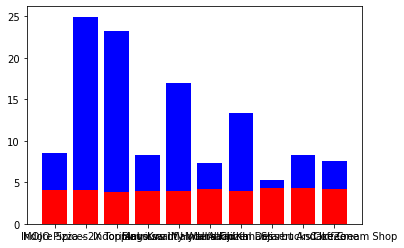

In [34]:
x = baner_ratings['Name']
y1 = baner_ratings['ratings']
y2 = baner_ratings['deliv']


plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

In [ ]:

above_four.plot.bar(stacked =True)
labels = [above_four['Name']]
men_means = [above_four['ratings']]
women_means = [above_four['deliv']]
#men_std = [2, 3, 4, 1, 2]
#women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence
​
fig, ax = plt.subplots()
​
ax.bar(labels, men_means, width, label='Men')
ax.bar(labels, women_means, width, bottom=men_means,
       label='Women')
​
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()
​
plt.show()

import matplotlib.pyplot as plt
A = [above_four['ratings']]
B = [above_four['deliv']]
Pos = range(4)
plt.bar(Pos, A)
plt.bar(Pos, B, bottom = A)
plt.show()

## Ratings null and Not null count

### BANER

In [ ]:
print('Null values in Baner data set:', baner_copy['ratings'].isna().sum())

In [ ]:
baner_copy['ratings'].notnull().sum()

### BAVDHAN

In [ ]:
bavdhan_copy['ratings'].isna().sum()

In [ ]:
bavdhan_copy['ratings'].notnull().sum()

### HINJEWADI

In [ ]:
hinjewadi_copy['ratings'].isna().sum()

In [ ]:
hinjewadi_copy['ratings'].notnull().sum()

### WAKAD

In [ ]:
wakad_copy['ratings'].isna().sum()

In [ ]:
wakad_copy['ratings'].notnull().sum()

In [ ]:
baner_ratings.isna().sum()

In [ ]:
baner_copy.isnull().sum()